# PIA05 Tarea
## Alejandro García López

## Apartado 1

Importar librerías necesarias

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10

Importamos el dataset cifar10

In [32]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Exploramos los datos para verificar su forma y aplicar normalización.

In [33]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


Para aplicar normalización a los datos, convertiremos los valores de píxeles a un rango (0,1)

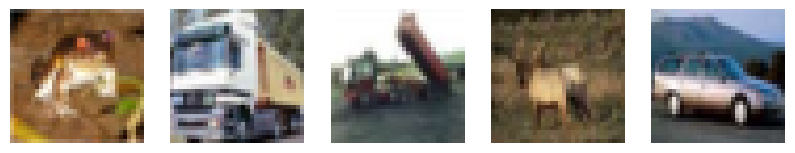

In [34]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(10,2))
for i in range(5):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')
plt.show()

In [35]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [36]:
print(f'Valor mínimo después de normalización: {X_train.min()}')
print(f'Valor máximo después de normalización: {X_train.max()}')

Valor mínimo después de normalización: 0.0
Valor máximo después de normalización: 1.0


In [37]:
for i in range (0,5):
  print(f'Etiqueta: {y_train[i]}')

Etiqueta: [6]
Etiqueta: [9]
Etiqueta: [9]
Etiqueta: [4]
Etiqueta: [1]


Recurrimos a la técnica de one-hot encoding para convertir las etiquetas del dataset a formato categórico.

In [38]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [39]:
for i in range (0,5):
  print(f'Etiqueta: {y_train[i]}')

Etiqueta: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Etiqueta: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Etiqueta: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Etiqueta: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Etiqueta: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


Creación del modelo base y entrenamiento

In [ ]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2765 - loss: 2.0156 - val_accuracy: 0.3774 - val_loss: 1.7457
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.3675 - loss: 1.7607 - val_accuracy: 0.3816 - val_loss: 1.7265
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.3904 - loss: 1.7111 - val_accuracy: 0.3983 - val_loss: 1.6844
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.4021 - loss: 1.6750 - val_accuracy: 0.4108 - val_loss: 1.6505
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4109 - loss: 1.6609 - val_accuracy: 0.4112 - val_loss: 1.6486
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4122 - loss: 1.6517 - val_accuracy: 0.4190 - val_loss: 1.6387
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4150 - loss: 1.6429 - val_accuracy: 0.4094 - val_loss: 1.6427
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4246 - loss: 1

## Mejora del modelo

In [40]:
model2 = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [41]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2800 - loss: 1.9965 - val_accuracy: 0.3861 - val_loss: 1.7259
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3949 - loss: 1.6922 - val_accuracy: 0.4301 - val_loss: 1.5905
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4207 - loss: 1.6070 - val_accuracy: 0.4256 - val_loss: 1.6023
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4405 - loss: 1.5584 - val_accuracy: 0.4533 - val_loss: 1.5380
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4481 - loss: 1.5279 - val_accuracy: 0.4450 - val_loss: 1.5307
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4620 - loss: 1.4999 - val_accuracy: 0.4549 - val_loss: 1.5251
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4722 - loss: 1.4753 - val_accuracy: 0.4626 - val_loss: 1.5063
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4750 - loss: 1.4654 - 

In [42]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Precisión en test: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4867 - loss: 1.4761
Precisión en test: 0.4876


##Visualización de datos

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


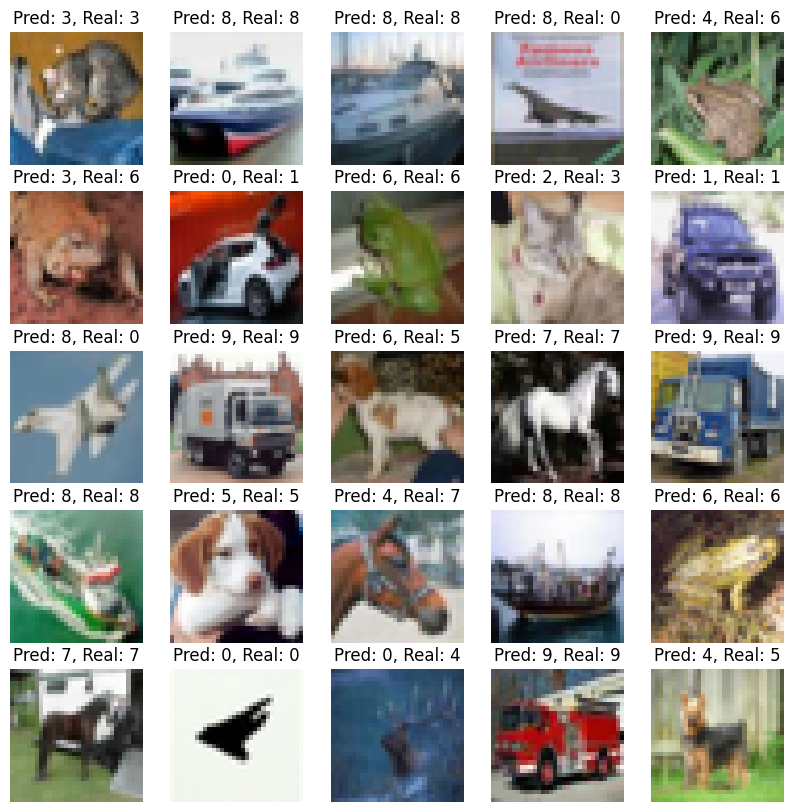

In [ ]:

predictions = model2.predict(X_test)
fig, axes = plt.subplots(5, 5, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])
    pred_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    ax.set_title(f'Pred: {pred_label}, Real: {true_label}')
    ax.axis('off')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


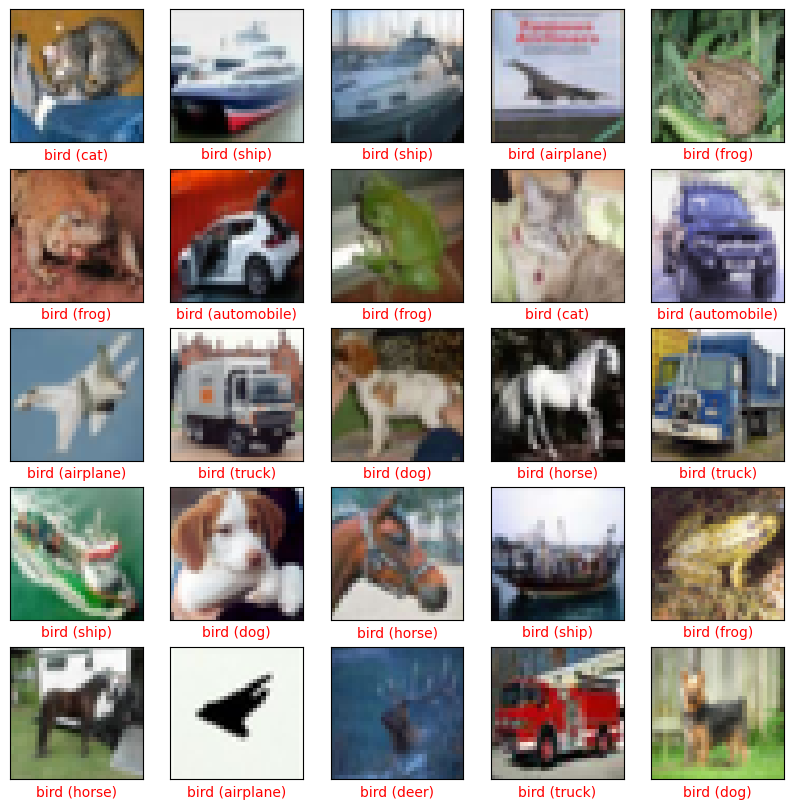

In [43]:
predictions = model.predict(X_test)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i]
    true_label = y_test[i]
    if predicted_label.argmax() == true_label.tolist().index(1.):
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()],
                                  class_names[true_label.tolist().index(1.)]),
                                  color=color)

#Extra: otras posibilibales de entrenamiento y capas

In [25]:
# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(X_train)
# capas convolucionales
from tensorflow.keras.layers import Conv2D, MaxPooling2D
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
# regularización
from tensorflow.keras.layers import Dropout, BatchNormalization
model.add(BatchNormalization())
model.add(Dropout(0.5))
# optimizar hiperparámetros
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(datagen.flow(X_train, y_train, batch_size=64),
          epochs=50,
          validation_data=(X_test, y_test),
          steps_per_epoch=len(X_train) // 64)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 35s 39ms/step - accuracy: 0.0955 - loss: nan - val_accuracy: 0.0894 - val_loss: 6.4786
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0312 - loss: 11.3921

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0312 - loss: 11.3921 - val_accuracy: 0.0891 - val_loss: 6.4630
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.0951 - loss: nan - val_accuracy: 0.0918 - val_loss: 3.9217
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1250 - loss: nan - val_accuracy: 0.0915 - val_loss: 3.9464
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.1084 - loss: nan - val_accuracy: 0.1037 - val_loss: 3.3779
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1250 - loss: 10.5169 - val_accuracy: 0.1038 - val_loss: 3.3808
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.1052 - loss: nan - val_accuracy: 0.1032 - val_loss: 3.5830
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.1562 - loss: 10.1072 - val_accuracy: 0.1035 - val_loss: 3.5723
Epoch 9/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.1082 - loss: nan - val_accuracy: 0.1033 - val_lo